#Download Dataset from Kaggle

In [1]:
 !pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 6.6MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp37-none-any.whl size=73269 sha256=5c4f751fb2a4b0538ea3cdcde8288015686d6617a51cfab5e8f6d77d025a5bc1
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"petarvasiljevic","key":"dae47a988e82509cb90196d0de28fc56"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 99% 446M/450M [00:02<00:00, 205MB/s]
100% 450M/450M [00:02<00:00, 175MB/s]


In [5]:
!unzip flowers-recognition.zip -d flowers-recognition

Streaming output truncated to the last 5000 lines.
  inflating: flowers-recognition/flowers/flowers/rose/110472418_87b6a3aa98_m.jpg  
  inflating: flowers-recognition/flowers/flowers/rose/11102341464_508d558dfc_n.jpg  
  inflating: flowers-recognition/flowers/flowers/rose/11233672494_d8bf0a3dbf_n.jpg  
  inflating: flowers-recognition/flowers/flowers/rose/11694025703_9a906fedc1_n.jpg  
  inflating: flowers-recognition/flowers/flowers/rose/118974357_0faa23cce9_n.jpg  
  inflating: flowers-recognition/flowers/flowers/rose/11944957684_2cc806276e.jpg  
  inflating: flowers-recognition/flowers/flowers/rose/12165480946_c4a3fe182d_n.jpg  
  inflating: flowers-recognition/flowers/flowers/rose/12202373204_34fb07205b.jpg  
  inflating: flowers-recognition/flowers/flowers/rose/12238827553_cf427bfd51_n.jpg  
  inflating: flowers-recognition/flowers/flowers/rose/12240165555_98625b1e88_n.jpg  
  inflating: flowers-recognition/flowers/flowers/rose/12240303_80d87f77a3_n.jpg  
  inflating: flowers-reco

In [6]:
#For some reason, inside of flowers folder is additional flowers folder
import shutil
shutil.rmtree('flowers-recognition/flowers/flowers', ignore_errors=True)

#Import Libraries

In [7]:
import warnings
warnings.filterwarnings("ignore")

import os
import cv2

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
import random

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.utils import to_categorical
from keras.applications import InceptionV3
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

#Load Dataset

In [8]:
print(os.listdir('flowers-recognition/flowers'))

['dandelion', 'rose', 'tulip', 'sunflower', 'daisy']


In [9]:
daisy_dir = 'flowers-recognition/flowers/daisy'
dandelion_dir = 'flowers-recognition/flowers/dandelion'
rose_dir = 'flowers-recognition/flowers/rose'
sunflower_dir = 'flowers-recognition/flowers/sunflower'
tulip_dir = 'flowers-recognition/flowers/tulip'

Load images

In [10]:
images = []
labels = []
img_size = 150
def get_image(dir, flower_name):
  for file_name in tqdm(os.listdir(dir)):
    try:
      path = os.path.join(dir, file_name)

      img = cv2.imread(path)
      img = cv2.resize(img, (img_size, img_size))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

      images.append(np.array(img))
      labels.append(flower_name)
    except:
      print(path)

In [11]:
get_image(daisy_dir, 'Daisy')

100%|██████████| 769/769 [00:01<00:00, 482.24it/s]


In [12]:
get_image(dandelion_dir, 'Dandelion')

 16%|█▌        | 170/1055 [00:00<00:02, 424.16it/s]

flowers-recognition/flowers/dandelion/flickr.pyc


 47%|████▋     | 492/1055 [00:01<00:01, 460.01it/s]

flowers-recognition/flowers/dandelion/run_me.py


 92%|█████████▏| 974/1055 [00:02<00:00, 463.47it/s]

flowers-recognition/flowers/dandelion/flickr.py


100%|██████████| 1055/1055 [00:02<00:00, 455.02it/s]


In [13]:
get_image(rose_dir, 'Rose')

100%|██████████| 784/784 [00:01<00:00, 487.55it/s]


In [14]:
get_image(sunflower_dir, 'Sunflower')

100%|██████████| 734/734 [00:01<00:00, 395.52it/s]


In [15]:
get_image(tulip_dir, 'Tulip')

100%|██████████| 984/984 [00:02<00:00, 446.37it/s]


In [16]:
len(images)

4323

In [17]:
images = np.array(images)
labels = np.array(labels)

print('Input shape {}'.format(images.shape))
print('Output shape {}'.format(labels.shape))

Input shape (4323, 150, 150, 3)
Output shape (4323,)


Visualization of some images

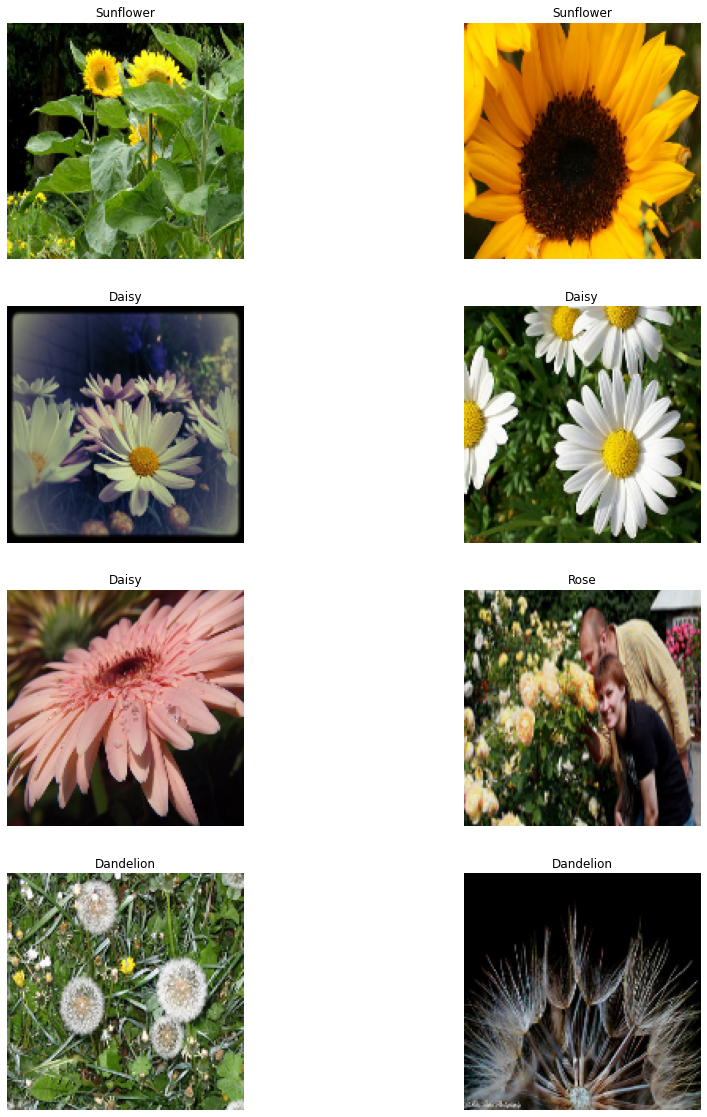

In [18]:
fig, axs = plt.subplots(4, 2, figsize = (15,20))
for i in range(4):
  for j in range(2):
    index_of_image = random.randint(0,len(images))
    axs[i, j].imshow(images[index_of_image])
    axs[i, j].set_title(labels[index_of_image])
    axs[i, j].axis('off')

Count of images for each class

Text(0, 0.5, 'Count')

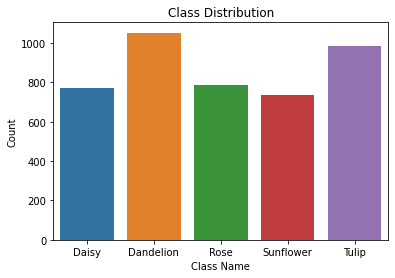

In [19]:
sns.countplot(labels)
plt.title("Class Distribution")
plt.xlabel("Class Name")
plt.ylabel("Count")

In [20]:
le = LabelEncoder()
y = le.fit_transform(labels)
#print(y)        #uncomment to see the difference
y = to_categorical(y, 5)
print(y)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [21]:
#Normalize input data in range [0,1]
X = images/255  

Now, we have input X and output y

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [23]:
print('X_train shape {}'.format(X_train.shape))
print('y_train shape {}'.format(y_train.shape))
print('X_test shape {}'.format(X_test.shape))
print('y_test shape {}'.format(y_test.shape))

X_train shape (3458, 150, 150, 3)
y_train shape (3458, 5)
X_test shape (865, 150, 150, 3)
y_test shape (865, 5)


In [24]:
np.random.seed(42)
random.seed(42)

#Build model

In [26]:
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3), pooling='avg')
base_model.summary()

87916544/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________

In [27]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

Create actual model

In [28]:
model = Sequential()

model.add(base_model)
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2048)              21802784  
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
Total params: 22,328,613
Trainable params: 22,294,181
Non-trainable params: 34,432
_________________________________________________________________


In [29]:
base_model.trainable = False

In [30]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, min_delta=0.0001)

In [31]:
datagen = ImageDataGenerator(featurewise_center=False, 
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             rotation_range=10,
                             zoom_range=0.1,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip = True,
                             vertical_flip=False
                             )

In [32]:
datagen.fit(X_train)

In [33]:
model.compile(
    optimizer=Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [34]:
batch_size = 64

history = model.fit_generator(
    datagen.flow(X_train, y_train, batch_size),
    validation_data = (X_test, y_test),
    epochs = 50,
    verbose = 1,
    steps_per_epoch=X_train.shape[0] // batch_size
)

Epoch 1/50
54/54 [==============================] - 57s 380ms/step - loss: 1.3249 - accuracy: 0.4715 - val_loss: 0.7329 - val_accuracy: 0.7237
Epoch 2/50
54/54 [==============================] - 17s 318ms/step - loss: 0.7150 - accuracy: 0.7337 - val_loss: 0.6457 - val_accuracy: 0.7676
Epoch 3/50
54/54 [==============================] - 17s 317ms/step - loss: 0.6553 - accuracy: 0.7655 - val_loss: 0.5793 - val_accuracy: 0.7884
Epoch 4/50
54/54 [==============================] - 17s 316ms/step - loss: 0.5876 - accuracy: 0.7937 - val_loss: 0.5452 - val_accuracy: 0.8023
Epoch 5/50
54/54 [==============================] - 17s 319ms/step - loss: 0.5415 - accuracy: 0.8097 - val_loss: 0.5447 - val_accuracy: 0.8035
Epoch 6/50
54/54 [==============================] - 17s 318ms/step - loss: 0.5204 - accuracy: 0.8107 - val_loss: 0.5277 - val_accuracy: 0.8000
Epoch 7/50
54/54 [==============================] - 17s 321ms/step - loss: 0.5077 - accuracy: 0.8220 - val_loss: 0.5331 - val_accuracy: 0.8092

#Plot history

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'Accuracy')

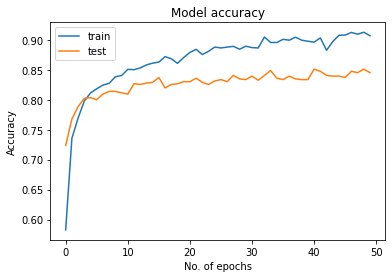

In [37]:
plt.plot(history.epoch, history.history['accuracy'])
plt.plot(history.epoch, history.history['val_accuracy'])
plt.title('Model accuracy')
plt.legend(['train','test'])
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

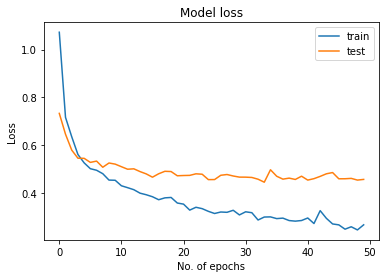

In [38]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.title('Model loss')
plt.legend(['train','test'])
plt.xlabel('No. of epochs')
plt.ylabel('Loss')